<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Multimodal RAG with Document Retrieval (ColPali), Vision Language Model (ColQwen2) and Amazon Nova
</h1>.

<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
    Loading the PDF files (Dataset)
</h1>

In [1]:
import requests
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Download pdfs from different sources 
def download_pdf(pdfs, output_dir):
    for name, url in pdfs.items():
        response = requests.get(url)
        pdf_path = os.path.join(output_dir, f"{name}.pdf")

        with open(pdf_path, "wb") as f:
            f.write(response.content)

        print(f"Downloaded {name} to {pdf_path}")

In [2]:
pdfs = {
    "MALM": "https://www.ikea.com/us/en/assembly_instructions/malm-4-drawer-chest-white__AA-2398381-2-100.pdf",
    "BILLY": "https://www.ikea.com/us/en/assembly_instructions/billy-bookcase-white__AA-1844854-6-2.pdf",
    "BOAXEL": "https://www.ikea.com/us/en/assembly_instructions/boaxel-wall-upright-white__AA-2341341-2-100.pdf",
    "ADILS": "https://www.ikea.com/us/en/assembly_instructions/adils-leg-white__AA-844478-6-2.pdf",
    "MICKE": "https://www.ikea.com/us/en/assembly_instructions/micke-desk-white__AA-476626-10-100.pdf",
    "Transformers": "https://arxiv.org/pdf/1706.03762.pdf",  
    "DSPy": "https://arxiv.org/pdf/2310.03714.pdf", 
    "ColPali": "https://arxiv.org/pdf/2407.01449.pdf",
}

# Downloading the PDF files 
output_dir = "./data"
os.makedirs(output_dir, exist_ok=True)

download_pdf(pdfs, output_dir)


Downloaded MALM to ./data/MALM.pdf
Downloaded BILLY to ./data/BILLY.pdf
Downloaded BOAXEL to ./data/BOAXEL.pdf
Downloaded ADILS to ./data/ADILS.pdf
Downloaded MICKE to ./data/MICKE.pdf
Downloaded Transformers to ./data/Transformers.pdf
Downloaded DSPy to ./data/DSPy.pdf
Downloaded ColPali to ./data/ColPali.pdf


<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Converting PDF to Images 
</h1>


In [3]:
import os
from pdf2image import convert_from_path


def convert_pdfs_to_images(pdf_folder):

    pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith(".pdf")]
    all_images = {}

    for doc_id, pdf_file in enumerate(pdf_files):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        images = convert_from_path(pdf_path)
        all_images[doc_id] = images

    return all_images

In [4]:
all_images = convert_pdfs_to_images(output_dir)
all_images

{0: [<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654

<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Visualizing the images
</h1>

In [5]:
from matplotlib import pyplot as plt

def display_image_grid(images, num_cols=4, figsize=(15, 10)):
    """
    Display a grid of images using matplotlib.
    
    Args:
        images: List of images to display
        num_cols: Number of columns in the grid (default: 8)
        figsize: Figure size as tuple (width, height) (default: (15, 10))
    """
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate needed rows
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flat  # Flatten axes array for easier iteration
    
    # Display images
    for i in range(num_cols * num_rows):
        ax = axes[i]
        if i < num_images:
            ax.imshow(images[i])
        ax.axis("off")
        
    plt.tight_layout()
    plt.show()

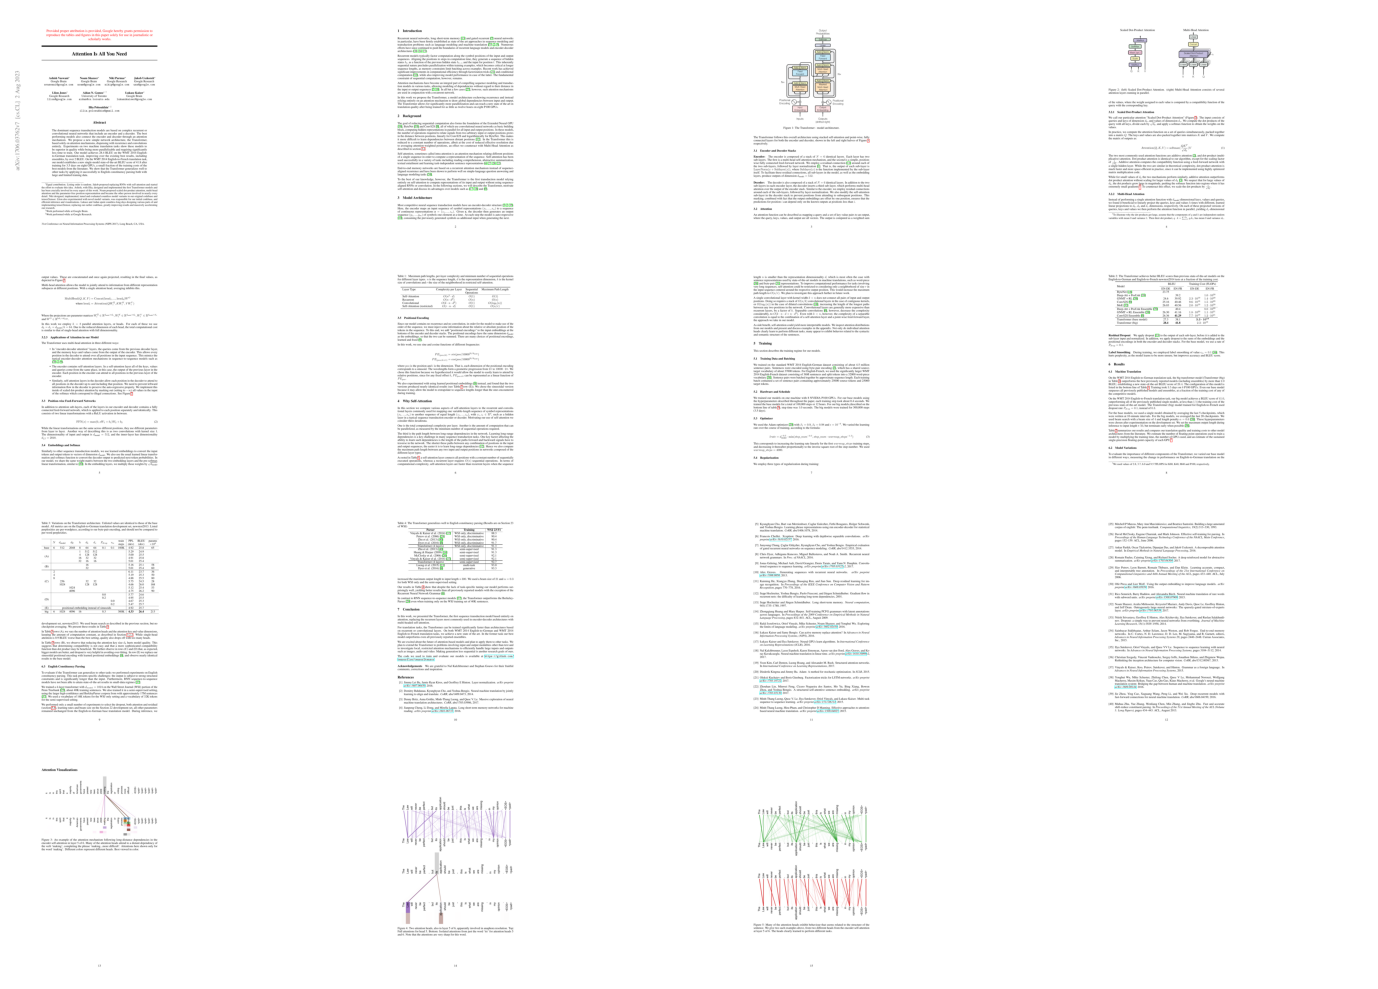

In [8]:
display_image_grid(all_images[6])

<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  ColPali Multimodal Document Retrieval Model
</h1>

In [9]:
import torch 

# Check if CUDA/MPS is available
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"{device = }")

device = 'mps'


### Create the ColPali Multimodal Document Retrieval Model

In [10]:
from byaldi import RAGMultiModalModel

## Initialize the ColPali Multimodal Document Retrieval Model
model_name = "vidore/colpali-v1.2"
myRAG = RAGMultiModalModel.from_pretrained(model_name,
                                           device=device)


Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
myRAG.index(input_path=output_dir, 
            index_name="all_docs_index", 
            store_collection_with_index=False, 
            overwrite=True)

Indexing file: data/MICKE.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to index.
Index exported to .byaldi/all_docs_index
Indexing file: data/DSPy.p

{0: 'data/MICKE.pdf',
 1: 'data/DSPy.pdf',
 2: 'data/ColPali.pdf',
 3: 'data/BOAXEL.pdf',
 4: 'data/ADILS.pdf',
 5: 'data/MALM.pdf',
 6: 'data/Transformers.pdf',
 7: 'data/BILLY.pdf'}

### Retrieving Documents with the Document Retrieval Model


In [12]:
text_query = "How many people are needed to assemble the Malm?"

results = myRAG.search(text_query, k=3)
results

[{'doc_id': 5, 'page_num': 1, 'score': 13.9375, 'metadata': {}, 'base64': None},
 {'doc_id': 5, 'page_num': 3, 'score': 11.4375, 'metadata': {}, 'base64': None},
 {'doc_id': 7, 'page_num': 13, 'score': 11.375, 'metadata': {}, 'base64': None}]

In [13]:
def get_matched_images(results, all_images):
    matched_images = []

    for result in results:
        doc_id = result["doc_id"]
        page_num = result["page_num"]
        matched_images.append(
            all_images[doc_id][page_num - 1]
        )  

    return matched_images

In [14]:
matched_images = get_matched_images(results, all_images)
matched_images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>]

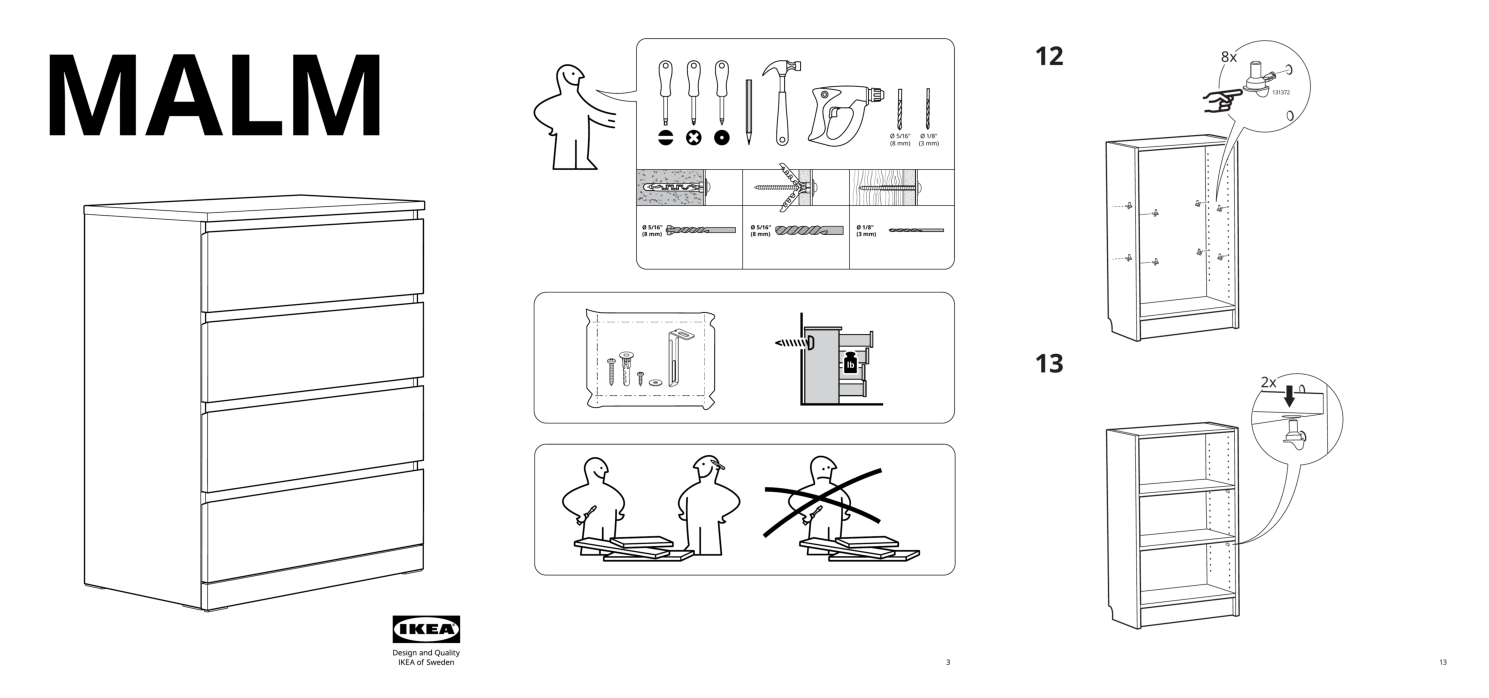

In [15]:
display_image_grid(matched_images, num_cols=3)

In [16]:
from PIL import Image
import os

def save_images_as_png(image_list, output_dir="matched_images"):
    """
    Convert a list of PIL images to PNG format and save them.

    :param image_list: List of PIL image objects.
    :param output_dir: Directory where images will be saved.
    :return: List of file paths for the saved PNG images.
    """
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist
    file_paths = []                         # List to store file paths

    for idx, img in enumerate(image_list):
        file_path = os.path.join(output_dir, f"image_{idx+1}.png")
        img.save(file_path, format="PNG")
        file_paths.append(file_path)       # Add file path to the list

    return file_paths 

In [17]:
matched_items = save_images_as_png(matched_images)
print(matched_items)  

['matched_images/image_1.png', 'matched_images/image_2.png', 'matched_images/image_3.png']


<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Generation with Bedrock Nova
</h1>

In [18]:
import boto3
import base64

def read_and_encode_image(image_path: str):

    with open(image_path, 'rb') as image_file:
        image_bytes = image_file.read()
        
    base64_encoded = base64.b64encode(image_bytes).decode('utf-8')
    # Determine the image format (supported formats: jpg, jpeg, png, gif, webp)
    image_format = Image.open(image_path).format.lower()

    message_content = {
                    "image": {
                        "format": image_format,
                        "source": {"bytes": image_bytes},
                    }
                }
    
    return message_content


def send_images_to_model_using_converse(matched_items: list, query: str, model_id: str):

    system_prompt = 'You are a helpful assistant for question answering. Given the context, answer the question. Do not include any other text than the answer.'

    image_list = []
    for image_path in matched_items:
        image_list.append({
            "image_path": image_path, 
        })

    content_list = []
    for img in image_list:
        message_content = read_and_encode_image(img['image_path'])
        content_list.append(message_content)
    
    content_list.append({"text": query})
    system = [ { "text": system_prompt } ]
    
    # Define a "user" message including both the image and a text prompt.
    messages = [
        {
            "role": "user",
            "content": content_list,
        }
    ]
    
    # Configure the inference parameters.
    inf_params = {"temperature": .3, "maxTokens": 5000}
    
    # Initialize the Bedrock client
    client = boto3.client('bedrock-runtime', region_name='us-east-1')

    response = client.converse(
        modelId=model_id, 
        messages=messages,
        system=system, 
        inferenceConfig=inf_params
    )
    
    # Print Response
    output_message = response["output"]["message"]["content"][0]["text"]

    return output_message

In [19]:
PRO_MODEL_ID = "amazon.nova-pro-v1:0"
LITE_MODEL_ID = "amazon.nova-lite-v1:0"
MICRO_MODEL_ID = "amazon.nova-micro-v1:0"

response = send_images_to_model_using_converse(matched_items=matched_items, query=text_query, model_id=PRO_MODEL_ID)
print(response)

Two people are needed to assemble the Malm, as indicated by the two stick figures working together in the assembly instructions.


<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Test it yourself
</h1>

In [20]:
query = input("Enter your query: ")
response = send_images_to_model_using_converse(matched_items=matched_items, query=query, model_id=PRO_MODEL_ID)
print(response)

The DSPy programming model proposes a new approach to programming that combines the benefits of declarative and imperative programming styles. It allows developers to specify the desired outcome of a program and then automatically generates the necessary code to achieve that outcome. This model aims to simplify the programming process, reduce errors, and increase productivity by automating repetitive tasks and providing a more intuitive way to express complex logic. Additionally, the DSPy programming model supports parallel processing and distributed computing, enabling developers to take advantage of modern hardware architectures and scale their applications more effectively. Overall, the DSPy programming model represents a significant advancement in the field of programming and has the potential to revolutionize the way software is developed.


<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Putting it all together
</h1>

In [21]:
import os
from byaldi import RAGMultiModalModel
from PIL import Image
from pdf2image import convert_from_path
import torch

os.environ["TOKENIZERS_PARALLELISM"] = "false"

class ImageRetriever:
    def __init__(self, model_name, device, output_dir="matched_images"):
        """
        Initialize the RAG model for multimodal retrieval.
        
        :param model_name: Name of the pretrained model.
        :param device: Device to run the model on ('cpu' or 'cuda').
        :param output_dir: Directory where matched images will be saved.
        """
        self.myRAG = RAGMultiModalModel.from_pretrained(model_name, device=device)
        self.output_dir = output_dir
        self.indexed = False  # Flag to check if indexing is already done
        self.all_images = {}  # Dictionary to store images from PDFs

    def convert_pdfs_to_images(self, pdf_folder):
        """
        Convert all PDFs in the given folder into images and store them.

        :param pdf_folder: Path to the folder containing PDFs.
        """
        pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith(".pdf")]
        all_images = {}

        if not pdf_files:
            print("No PDF files found in the given folder.")

        for doc_id, pdf_file in enumerate(pdf_files):
            pdf_path = os.path.join(pdf_folder, pdf_file)
            images = convert_from_path(pdf_path)
            all_images[doc_id] = images  # Map doc_id to the images of this PDF

        self.all_images = all_images  # Store in class for retrieval
        print(f"Converted {len(pdf_files)} PDFs to images.")

    def index_documents(self, input_path, index_name="research_papers"):
        """
        Convert PDFs to images (if not already converted) and index the documents.

        :param input_path: Directory where the documents are stored.
        :param index_name: Name of the index.
        """
        if self.indexed:
            print("Documents are already indexed. Skipping indexing...")
            return

        # Convert PDFs to images before indexing
        self.convert_pdfs_to_images(input_path)

        # Index the documents
        self.myRAG.index(input_path=input_path, 
                         index_name=index_name, 
                         store_collection_with_index=False, 
                         overwrite=True)  # Avoid overwriting existing index

        self.indexed = True  # Set flag to True to prevent re-indexing
        print("Indexing completed successfully.")

    def get_matched_images(self, results):
        """
        Retrieve images that match the search results.

        :param results: List of search results containing doc_id and page_num.
        :return: List of PIL images.
        """
        matched_images = []
        for result in results:
            doc_id = result["doc_id"]
            page_num = result["page_num"]

            if doc_id in self.all_images and len(self.all_images[doc_id]) >= page_num:
                matched_images.append(self.all_images[doc_id][page_num - 1])
            else:
                print(f"Warning: Image for doc_id {doc_id} and page_num {page_num} not found.")

        return matched_images

    def save_images_as_png(self, image_list):
        """
        Convert and save PIL images as PNG format.

        :param image_list: List of PIL image objects.
        :return: List of file paths where images are saved.
        """
        os.makedirs(self.output_dir, exist_ok=True)  # Ensure output directory exists
        file_paths = []  # List to store saved file paths

        for idx, img in enumerate(image_list):
            file_path = os.path.join(self.output_dir, f"image_{idx + 1}.png")
            img.save(file_path, format="PNG")
            file_paths.append(file_path)

        return file_paths

    def retrieve_images(self, text_query, k=5):
        """
        Perform a search and retrieve matched image paths.

        :param text_query: Query string to search for.
        :param k: Number of results to return.
        :return: List of file paths to matched images.
        """
        if not self.indexed:
            raise ValueError("Documents are not indexed. Please call `index_documents()` first.")

        # Perform search using the query
        results = self.myRAG.search(text_query, k=k)

        # Retrieve matched images from the results
        matched_images = self.get_matched_images(results)

        if not matched_images:
            print("No matching images found.")
            return []

        # Save and return paths to the images
        return self.save_images_as_png(matched_images)


In [22]:
# Usage Example
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
model_name = "vidore/colpali-v1.2"
input_path = "./data"  # Folder containing the PDFs

# Initialize the ImageRetriever class
image_retriever = ImageRetriever(model_name=model_name, device=device)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
# Index documents (automatically converts PDFs to images before indexing)
image_retriever.index_documents(input_path)


Converted 8 PDFs to images.
overwrite is on. Deleting existing index research_papers to build a new one.
Indexing file: data/MICKE.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.


In [26]:
text_query = "What is positional encoding?"

# Now, perform searches multiple times without re-indexing
matched_image_paths = image_retriever.retrieve_images(text_query)

# Print the matched image paths
print(matched_image_paths)

['matched_images/image_1.png', 'matched_images/image_2.png', 'matched_images/image_3.png', 'matched_images/image_4.png', 'matched_images/image_5.png']


In [27]:
response = send_images_to_model_using_converse(matched_items=matched_image_paths, query=text_query, model_id=PRO_MODEL_ID)
print(response)

Positional encoding is a method used in the Transformer model to inject information about the relative or absolute position of the tokens in a sequence. This is necessary because the model contains no recurrence and no convolution, which means it does not inherently understand the order of the sequence. Positional encodings are added to the input embeddings at the bottoms of the encoder and decoder stacks, ensuring that the embeddings have the same dimension as the input embeddings. The model uses sine and cosine functions of different frequencies for positional encoding, which allows it to easily learn to attend to relative positions.
